# Introduction

## About

The current pandemic has dwindled the data science job market likewise recruiters are also facing difficulties filtering the right talent. To bridge this gap we bring a chance for the MachineHack community to compete for jobs with some of the key analytics players for a rewarding career in Data Science. In this competition, we are challenging the MachineHack community to come up with an algorithm to predict the price of retail items belonging to different categories. Foretelling the Retail price can be a daunting task due to the huge datasets with a variety of attributes ranging from Text, Numbers(floats, integers), and DateTime. Also, outliers can be a big problem when dealing with unit prices.

With a key focus on the Data Scientist role in an esteemed organization, this hackathon can help freshers and experienced folks prove their mettle and land up in a rewarding career.

By participating in this hackathon, every participant will be eligible for the Data Scientist job role by making sure their MachineHack Information with Resume is up to date.

## Dataset

**Data info :**

Train.csv - 284780 rows x 8 columns (Inlcudes UnitPrice Columns as Target)<br>
Test.csv  - 122049 rows x 7 columns

**Attributes info :**

- Invoice No  - Invoice ID, encoded as Label<br>
- StockCode   - Unique code per stock, encoded as Label<br>
- Description - The Description, encoded as Label<br>
- Quantity    - Quantity purchased<br>
- InvoiceDate - Date of purchase<br>
- UnitPrice   - The target value, price of every product<br>
- CustomerID  - Unique Identifier for every country<br>
- Country     - Country of sales, encoded as Label

## Goals

- Creating a multivariate regression model.<br>
- Handling the given big dataset.<br>
- Avoiding underfitting and overfitting.<br>
- Optimizing RMSE to generalize well on unseen data.<br>

# Importing data and packages

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Importing the data

In [2]:
train = pd.read_csv('data/Train.csv')

In [3]:
train.head()

InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       6141       1583          144         3  2011-05-06 16:54:00   
1       6349       1300         3682         6  2011-05-11 07:35:00   
2      16783       2178         1939         4  2011-11-20 13:20:00   
3      16971       2115         2983         1  2011-11-22 12:07:00   
4       6080       1210         2886        12  2011-05-06 09:00:00   

   UnitPrice  CustomerID  Country  
0       3.75     14056.0       35  
1       1.95     13098.0       35  
2       5.95     15044.0       35  
3       0.83     15525.0       35  
4       1.65     13952.0       35

**Dropping duplicates :**

In [4]:
train.shape

(284780, 8)

In [5]:
train = train.drop_duplicates()

In [6]:
train = train.reset_index()

In [7]:
train.shape

(282159, 9)

**Some details regarding the data :**

In [8]:
train.describe().T

count           mean           std      min       25%  \
index        282159.0  141964.739073  82212.491359      0.0  70715.50   
InvoiceNo    282159.0    9949.557267   5547.353569      0.0   5069.00   
StockCode    282159.0    1573.707527    843.814154      0.0    942.00   
Description  282159.0    2024.261955   1089.992911      0.0   1141.00   
Quantity     282159.0      12.109885    296.463809 -80995.0      2.00   
UnitPrice    282159.0       3.460501     78.762448      0.0      1.25   
CustomerID   282159.0   15283.444366   1714.633177  12346.0  13947.00   
Country      282159.0      32.805964      6.768422      0.0     35.00   

                   50%        75%       max  
index        141745.00  213127.50  284779.0  
InvoiceNo     10294.00   14640.00   22188.0  
StockCode      1522.00    2106.00    3683.0  
Description    1987.00    2945.00    3895.0  
Quantity          5.00      12.00   80995.0  
UnitPrice         1.95       3.75   38970.0  
CustomerID    15147.00   16791.00   18287.0  
Country          35.00      35.00      36.0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282159 entries, 0 to 282158
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        282159 non-null  int64  
 1   InvoiceNo    282159 non-null  int64  
 2   StockCode    282159 non-null  int64  
 3   Description  282159 non-null  int64  
 4   Quantity     282159 non-null  int64  
 5   InvoiceDate  282159 non-null  object 
 6   UnitPrice    282159 non-null  float64
 7   CustomerID   282159 non-null  float64
 8   Country      282159 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 19.4+ MB


In [10]:
train.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

> *NO MISSING VALUES WITHIN THE GIVEN TRAINING SET.*

# Exploratory data analysis

## Univariate analysis

### Analyzing stock code

In [11]:
stock_codes_meta = train['StockCode'].value_counts()

In [12]:
print("Top 10 repeating stock codes \nStockcode : Frequency\n")
print(stock_codes_meta[:10])

Top 10 repeating stock codes 
Stockcode : Frequency

3249    1473
1292    1289
3235    1171
3069     993
170      992
2599     966
1574     850
3683     840
2037     781
1092     768
Name: StockCode, dtype: int64


### Analyzing Description

In [13]:
description_meta = train['Description'].value_counts()

In [14]:
print("Top 10 repeating description \nDescription : Frequency\n")
print(description_meta[:10])

Top 10 repeating description 
Description : Frequency

3716    1467
2780    1289
1771    1171
217      993
1953     991
2355     966
3014     850
2624     840
2279     753
1945     749
Name: Description, dtype: int64


### Analyzing quantity

In [15]:
quantity_meta = train['Quantity'].value_counts()

In [16]:
print("Top 10 repeating quantity \nQuantity : Frequency\n")
print(quantity_meta[:10])

Top 10 repeating quantity 
Quantity : Frequency

1     49377
12    41976
2     40428
6     26278
4     22563
3     18732
24    16533
10    14707
8      8128
5      5716
Name: Quantity, dtype: int64


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

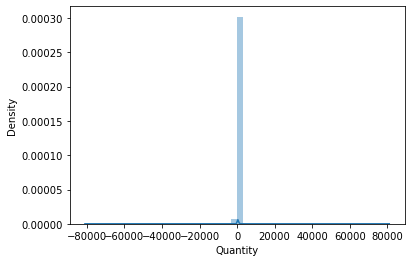

In [17]:
sns.distplot(train['Quantity'])

### Analyzing invoice date

In [18]:
invoice_date_meta = train['InvoiceDate'].value_counts()

In [19]:
print("Top 10 repeating invoice_dates \nInvoiceDate : Frequency\n")
print(invoice_date_meta[:10])

Top 10 repeating invoice_dates 
InvoiceDate : Frequency

2011-11-28 15:54:00    385
2011-11-14 15:27:00    384
2011-12-05 17:17:00    361
2011-10-31 14:09:00    311
2011-11-23 13:39:00    307
2011-09-21 14:40:00    273
2011-11-10 12:37:00    268
2011-10-17 13:31:00    260
2011-10-24 17:07:00    257
2011-09-26 15:28:00    245
Name: InvoiceDate, dtype: int64


**Converting date into datetime format:**

In [20]:
InvoiceDate = pd.to_datetime(train['InvoiceDate'])

In [21]:
InvoiceDate[0]

Timestamp('2011-05-06 16:54:00')

In [22]:
print(InvoiceDate[0].year)
print(InvoiceDate[0].month)
print(InvoiceDate[0].day)
print(InvoiceDate[0].hour)
print(InvoiceDate[0].minute)

2011
5
6
16
54


In [23]:
train['Year'] = ''
train['Month'] = ''
train['Day'] = ''
train['Hour'] = ''
train['Minute'] = ''
train.head()

index  InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0      0       6141       1583          144         3  2011-05-06 16:54:00   
1      1       6349       1300         3682         6  2011-05-11 07:35:00   
2      2      16783       2178         1939         4  2011-11-20 13:20:00   
3      3      16971       2115         2983         1  2011-11-22 12:07:00   
4      4       6080       1210         2886        12  2011-05-06 09:00:00   

   UnitPrice  CustomerID  Country Year Month Day Hour Minute  
0       3.75     14056.0       35                             
1       1.95     13098.0       35                             
2       5.95     15044.0       35                             
3       0.83     15525.0       35                             
4       1.65     13952.0       35

In [24]:
year = np.zeros(len(train))
month = np.zeros(len(train))
day = np.zeros(len(train))
hour = np.zeros(len(train))
minute = np.zeros(len(train))
for i in tqdm(range(len(train))):
    year[i] = InvoiceDate[i].year
    month[i] = InvoiceDate[i].month
    day[i] = InvoiceDate[i].day
    hour[i] = InvoiceDate[i].hour
    minute[i] = InvoiceDate[i].minute

100%|██████████| 282159/282159 [00:18<00:00, 15140.23it/s]


In [25]:
train['Year'] = year
train['Month'] = month
train['Day'] = day
train['Hour'] = hour
train['Minute'] = minute

In [26]:
train.head()

index  InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0      0       6141       1583          144         3  2011-05-06 16:54:00   
1      1       6349       1300         3682         6  2011-05-11 07:35:00   
2      2      16783       2178         1939         4  2011-11-20 13:20:00   
3      3      16971       2115         2983         1  2011-11-22 12:07:00   
4      4       6080       1210         2886        12  2011-05-06 09:00:00   

   UnitPrice  CustomerID  Country    Year  Month   Day  Hour  Minute  
0       3.75     14056.0       35  2011.0    5.0   6.0  16.0    54.0  
1       1.95     13098.0       35  2011.0    5.0  11.0   7.0    35.0  
2       5.95     15044.0       35  2011.0   11.0  20.0  13.0    20.0  
3       0.83     15525.0       35  2011.0   11.0  22.0  12.0     7.0  
4       1.65     13952.0       35  2011.0    5.0   6.0   9.0     0.0

### Analyzing unit price (Target)

In [27]:
unit_price_meta = train['UnitPrice'].value_counts()

In [28]:
print("Top 10 repeating Unit price \nUnitPrice: Frequency\n")
print(unit_price_meta[:10])

Top 10 repeating Unit price 
UnitPrice: Frequency

1.25      32250
1.65      25883
2.95      18927
0.85      18239
0.42      15287
          ...  
1.12          9
35.75         9
2.17          9
295.00        8
10.00         8
Name: UnitPrice, Length: 181, dtype: int64


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

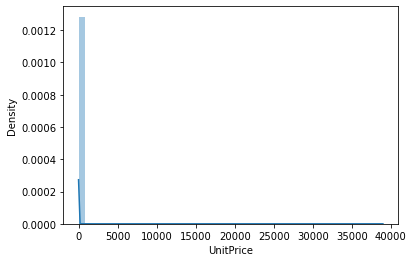

In [29]:
sns.distplot(train['UnitPrice'])

### Analyzing country

In [30]:
country_meta = train['Country'].value_counts()

In [31]:
print("\nCountry: Frequency\n")
print(country_meta)


Country: Frequency

35    250668
14      6648
13      5939
10      5238
30      1773
23      1680
3       1435
32      1293
26      1044
0        883
24       766
18       561
6        536
12       489
7        419
31       324
1        303
9        273
25       244
19       238
33       210
17       184
36       169
29       152
16       132
5        106
15       101
22        89
34        52
27        47
11        40
20        34
8         26
21        25
4         20
2         10
28         8
Name: Country, dtype: int64


# Preparing the data for modelling

## Dropping un-necessary columns

In [32]:
train_new = train.drop(['InvoiceDate','CustomerID','InvoiceNo','index'],axis=1)
train_new.head()

StockCode  Description  Quantity  UnitPrice  Country    Year  Month   Day  \
0       1583          144         3       3.75       35  2011.0    5.0   6.0   
1       1300         3682         6       1.95       35  2011.0    5.0  11.0   
2       2178         1939         4       5.95       35  2011.0   11.0  20.0   
3       2115         2983         1       0.83       35  2011.0   11.0  22.0   
4       1210         2886        12       1.65       35  2011.0    5.0   6.0   

   Hour  Minute  
0  16.0    54.0  
1   7.0    35.0  
2  13.0    20.0  
3  12.0     7.0  
4   9.0     0.0

## Splitting data into train and validation

In [33]:
x = train_new.drop(['UnitPrice'],axis=1)
y = train_new['UnitPrice']

In [34]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print("x_train : {0} | y_train : {1}".format(x_train.shape,y_train.shape))
print("x_val   : {0}  | y_val   : {1}".format(x_val.shape,y_val.shape))

x_train : (225727, 9) | y_train : (225727,)
x_val   : (56432, 9)  | y_val   : (56432,)


## One hot encoding stock code

In [36]:
vectorizer1 = CountVectorizer()
vectorizer1.fit(x_train['StockCode'].astype('str').values)

CountVectorizer()

In [37]:
x_train_stock_code_bow = vectorizer1.transform(x_train['StockCode'].astype('str').values)
x_val_stock_code_bow = vectorizer1.transform(x_val['StockCode'].astype('str').values)

In [38]:
print("Stock code features\n")
print("x_train_stock_code_bow : {0}".format(x_train_stock_code_bow.shape))
print("x_val_stock_code_bow   : {0}".format(x_val_stock_code_bow.shape))

Stock code features

x_train_stock_code_bow : (225727, 3568)
x_val_stock_code_bow   : (56432, 3568)


## One hot encoding description

In [39]:
vectorizer2 = CountVectorizer()
vectorizer2.fit(x_train['Description'].astype('str').values)

CountVectorizer()

In [40]:
x_train_description_bow = vectorizer2.transform(x_train['Description'].astype('str').values)
x_val_description_bow = vectorizer2.transform(x_val['Description'].astype('str').values)

In [41]:
print("Description features\n")
print("x_train_description_bow : {0}".format(x_train_description_bow.shape))
print("x_val_description_bow   : {0}".format(x_val_description_bow.shape))

Description features

x_train_description_bow : (225727, 3757)
x_val_description_bow   : (56432, 3757)


## One hot encoding country

In [42]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(x_train['Country'].astype('str').values)

CountVectorizer()

In [43]:
x_train_country_bow = vectorizer3.transform(x_train['Country'].astype('str').values)
x_val_country_bow = vectorizer3.transform(x_val['Country'].astype('str').values)

In [44]:
print("Country features\n")
print("x_train_country_bow : {0}".format(x_train_country_bow.shape))
print("x_val_country_bow   : {0}".format(x_val_country_bow.shape))

Country features

x_train_country_bow : (225727, 27)
x_val_country_bow   : (56432, 27)


## One hot encoding year

In [45]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(x_train['Year'].astype('str').values)

CountVectorizer()

In [46]:
x_train_year_bow = vectorizer4.transform(x_train['Year'].astype('str').values)
x_val_year_bow = vectorizer4.transform(x_val['Year'].astype('str').values)

In [47]:
print("Year features\n")
print("x_train_year_bow : {0}".format(x_train_year_bow.shape))
print("x_val_year_bow   : {0}".format(x_val_year_bow.shape))

Year features

x_train_year_bow : (225727, 2)
x_val_year_bow   : (56432, 2)


## Stacking all features

In [48]:
x_tr = hstack((x_train_stock_code_bow,x_train_description_bow,x_train['Quantity'].values.reshape(-1,1),x_train_country_bow,x_train_year_bow,x_train['Month'].values.reshape(-1,1),x_train['Day'].values.reshape(-1,1),x_train['Hour'].values.reshape(-1,1),x_train['Minute'].values.reshape(-1,1)))
x_vl = hstack((x_val_stock_code_bow,x_val_description_bow,x_val['Quantity'].values.reshape(-1,1),x_val_country_bow,x_val_year_bow,x_val['Month'].values.reshape(-1,1),x_val['Day'].values.reshape(-1,1),x_val['Hour'].values.reshape(-1,1),x_val['Minute'].values.reshape(-1,1)))

In [49]:
x_tr.shape

(225727, 7359)

In [50]:
x_vl.shape

(56432, 7359)

## SVD

In [51]:
svd = TruncatedSVD(n_components=6, n_iter=7, random_state=42)
svd.fit(x_tr)

TruncatedSVD(n_components=6, n_iter=7, random_state=42)

In [52]:
print(svd.explained_variance_ratio_.sum())

0.9999799912500051


In [53]:
print(svd.explained_variance_ratio_)

[9.96474590e-01 2.05012032e-03 1.09220653e-03 2.80600629e-04
 8.12839820e-05 1.18931838e-06]


In [54]:
x_tr_svd = svd.transform(x_tr)
x_vl_svd = svd.transform(x_vl)

In [55]:
x_tr_svd.shape

(225727, 6)

In [56]:
x_vl_svd.shape

(56432, 6)

# Modelling

## Model base

In [57]:
class Model:
    
    def __init__(self,estimator,x_train,y_train,x_val,y_val,params,name="None"):
        
        self.estimator = estimator
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.params = params
        self.name = name
    
    def print_results_without_tuning(self):
        
        print("\n####    {0}   ####\n".format(self.name))
        print("MSE on train      :",mean_squared_error(self.y_train,self.estimator.predict(self.x_train)))
        print("MSE on validation :",mean_squared_error(self.y_val,self.estimator.predict(self.x_val)))
        print("RMSE on train     :",np.sqrt(mean_squared_error(self.y_train,self.estimator.predict(self.x_train))))
        print("RMSE on validation:",np.sqrt(mean_squared_error(y_val,self.estimator.predict(self.x_val))))
        
    def print_results_with_tuning(self):
        
        print("\n####    {0}   ####\n".format(self.name))
        print("\Hyperparameters  :(Grid search)\n{0}\n".format(self.best_params))
        print("MSE on train      :",mean_squared_error(self.y_train,self.estimator.predict(self.x_train)))
        print("MSE on validation :",mean_squared_error(self.y_val,self.estimator.predict(self.x_val)))
        print("RMSE on train     :",np.sqrt(mean_squared_error(self.y_train,self.estimator.predict(self.x_train))))
        print("RMSE on validation:",np.sqrt(mean_squared_error(y_val,self.estimator.predict(self.x_val))))
        
    def train(self):
        
        if self.params=={}:
            print("\nTraining....\n")
            self.estimator.fit(self.x_train,self.y_train)
            self.print_results_without_tuning()
        else:
            print("\nTuning Hyperparameters....\n")
            self.clf = GridSearchCV(self.estimator, self.params)
            self.clf.fit(self.x_train,self.y_train)
            self.best_params = self.clf.best_params_
            print("\nTraining with best hyperparameters....\n")
            self.estimator(self.best_params)
            self.print_results_with_tuning()

## Linear Regression

In [58]:
reg1 = LinearRegression()
m1 = Model(reg1,x_tr_svd,y_train,x_vl_svd,y_val,params={},name="Linear Regression")
m1.train()


Training....


####    Linear Regression   ####

MSE on train      : 7565.470291012837
MSE on validation : 754.4447132461875
RMSE on train     : 86.97971195062006
RMSE on validation: 27.467156992418918


## Decision tree regression

In [59]:
reg2 = DecisionTreeRegressor()
m2 = Model(reg2,x_tr_svd,y_train,x_vl_svd,y_val,params={},name="Decision Tree Regression")
m2.train()


Training....


####    Decision Tree Regression   ####

MSE on train      : 25.741274051695935
MSE on validation : 27779.609530687263
RMSE on train     : 5.073585916459476
RMSE on validation: 166.6721618348045


## Random forest regression

In [60]:
reg3 = RandomForestRegressor(n_estimators=50)
m3 = Model(reg3,x_tr_svd,y_train,x_vl_svd,y_val,params={},name="Random Forest Regression")
m3.train()


Training....


####    Random Forest Regression   ####

MSE on train      : 832.2950032043083
MSE on validation : 1849.3116104980434
RMSE on train     : 28.849523448478458
RMSE on validation: 43.00362322523584


## XGBOOST Regressor

In [62]:
reg4 = XGBRegressor()
m4 = Model(reg4,x_tr_svd,y_train,x_vl_svd,y_val,params={},name="XGBOOST Regression")
m4.train()


Training....


####    XGBOOST Regression   ####

MSE on train      : 63.633772595338705
MSE on validation : 1076.3906428926146
RMSE on train     : 7.97707794843066
RMSE on validation: 32.8083928727485


In [81]:
exec("LinearRegression()")

# Prediction

In [63]:
test = pd.read_csv('data/Test.csv')

In [64]:
test.head()

InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       3139       1709         1079         3  2011-02-22 15:22:00   
1        617        510         3457         1  2010-12-08 12:46:00   
2      14653        604          694        36  2011-10-25 13:53:00   
3       8634       1478         3473         2  2011-06-27 12:38:00   
4      15546       3216          871         1  2011-11-06 16:14:00   

   CustomerID  Country  
0     16161.0       35  
1     17341.0       35  
2     15158.0       35  
3     16033.0       35  
4     15351.0       35

In [65]:
test['Year'] = ''
test['Month'] = ''
test['Day'] = ''
test['Hour'] = ''
test['Minute'] = ''
test.head()

InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       3139       1709         1079         3  2011-02-22 15:22:00   
1        617        510         3457         1  2010-12-08 12:46:00   
2      14653        604          694        36  2011-10-25 13:53:00   
3       8634       1478         3473         2  2011-06-27 12:38:00   
4      15546       3216          871         1  2011-11-06 16:14:00   

   CustomerID  Country Year Month Day Hour Minute  
0     16161.0       35                             
1     17341.0       35                             
2     15158.0       35                             
3     16033.0       35                             
4     15351.0       35

In [66]:
InvoiceDate = pd.to_datetime(test['InvoiceDate'])

In [67]:
year = np.zeros(len(test))
month = np.zeros(len(test))
day = np.zeros(len(test))
hour = np.zeros(len(test))
minute = np.zeros(len(test))
for i in tqdm(range(len(test))):
    year[i] = InvoiceDate[i].year
    month[i] = InvoiceDate[i].month
    day[i] = InvoiceDate[i].day
    hour[i] = InvoiceDate[i].hour
    minute[i] = InvoiceDate[i].minute

100%|██████████| 122049/122049 [00:08<00:00, 15057.42it/s]


In [68]:
test['Year'] = year
test['Month'] = month
test['Day'] = day
test['Hour'] = hour
test['Minute'] = minute

In [69]:
test.head()

InvoiceNo  StockCode  Description  Quantity          InvoiceDate  \
0       3139       1709         1079         3  2011-02-22 15:22:00   
1        617        510         3457         1  2010-12-08 12:46:00   
2      14653        604          694        36  2011-10-25 13:53:00   
3       8634       1478         3473         2  2011-06-27 12:38:00   
4      15546       3216          871         1  2011-11-06 16:14:00   

   CustomerID  Country    Year  Month   Day  Hour  Minute  
0     16161.0       35  2011.0    2.0  22.0  15.0    22.0  
1     17341.0       35  2010.0   12.0   8.0  12.0    46.0  
2     15158.0       35  2011.0   10.0  25.0  13.0    53.0  
3     16033.0       35  2011.0    6.0  27.0  12.0    38.0  
4     15351.0       35  2011.0   11.0   6.0  16.0    14.0

In [70]:
test_new = test.drop(['InvoiceNo','InvoiceDate','CustomerID'],axis=1)

In [71]:
test_new.head()

StockCode  Description  Quantity  Country    Year  Month   Day  Hour  \
0       1709         1079         3       35  2011.0    2.0  22.0  15.0   
1        510         3457         1       35  2010.0   12.0   8.0  12.0   
2        604          694        36       35  2011.0   10.0  25.0  13.0   
3       1478         3473         2       35  2011.0    6.0  27.0  12.0   
4       3216          871         1       35  2011.0   11.0   6.0  16.0   

   Minute  
0    22.0  
1    46.0  
2    53.0  
3    38.0  
4    14.0

In [72]:
x_test_stock_code_bow = vectorizer1.transform(test_new['StockCode'].astype('str').values)
x_test_description_bow = vectorizer2.transform(test_new['Description'].astype('str').values)
x_test_country_bow = vectorizer3.transform(test_new['Country'].astype('str').values)
x_test_year_bow = vectorizer4.transform(test_new['Year'].astype('str').values)

In [73]:
x_ts = hstack((x_test_stock_code_bow,x_test_description_bow,test_new['Quantity'].values.reshape(-1,1),x_test_country_bow,x_test_year_bow,test_new['Month'].values.reshape(-1,1),test_new['Day'].values.reshape(-1,1),test_new['Hour'].values.reshape(-1,1),test_new['Minute'].values.reshape(-1,1)))

In [74]:
x_ts_svd = svd.transform(x_ts)

In [75]:
pred = reg4.predict(x_ts_svd)

In [76]:
pred_df = pd.DataFrame(pred,columns=['UnitPrice'])
pred_df.head()

UnitPrice
0   3.017162
1   2.765800
2   1.373248
3   4.014705
4   4.729604

In [78]:
pred_df.to_csv('my_submission_file.csv', index=False)